In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C:/Users/JackC/Documents/TU Delft/BAP/Measurements/Stable.csv", sep=",")
end = 5000
fs = 250
df = df.iloc[:end, :8] # 3000 samples is 12 seconds of data
df

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8
0,-8.915,-10.059,-7.009,-14.081,-9.280,-11.682,-11.592,-7.524
1,-5.324,-8.059,-4.722,-11.473,-7.158,-10.473,-11.065,-6.499
2,-0.852,-3.834,-1.164,-7.041,-3.071,-6.358,-7.496,-3.079
3,2.978,0.699,2.066,-2.508,1.126,-1.363,-2.966,0.973
4,5.052,3.670,3.729,0.674,3.850,2.389,0.530,3.997
...,...,...,...,...,...,...,...,...
4995,1.100,-1.308,3.269,2.923,-1.483,0.018,-1.645,-0.992
4996,6.573,2.432,7.639,8.129,2.440,3.983,2.158,2.325
4997,11.591,6.301,11.979,12.767,6.347,7.842,6.143,5.460
4998,13.881,8.088,14.107,14.829,8.193,9.519,8.235,6.785


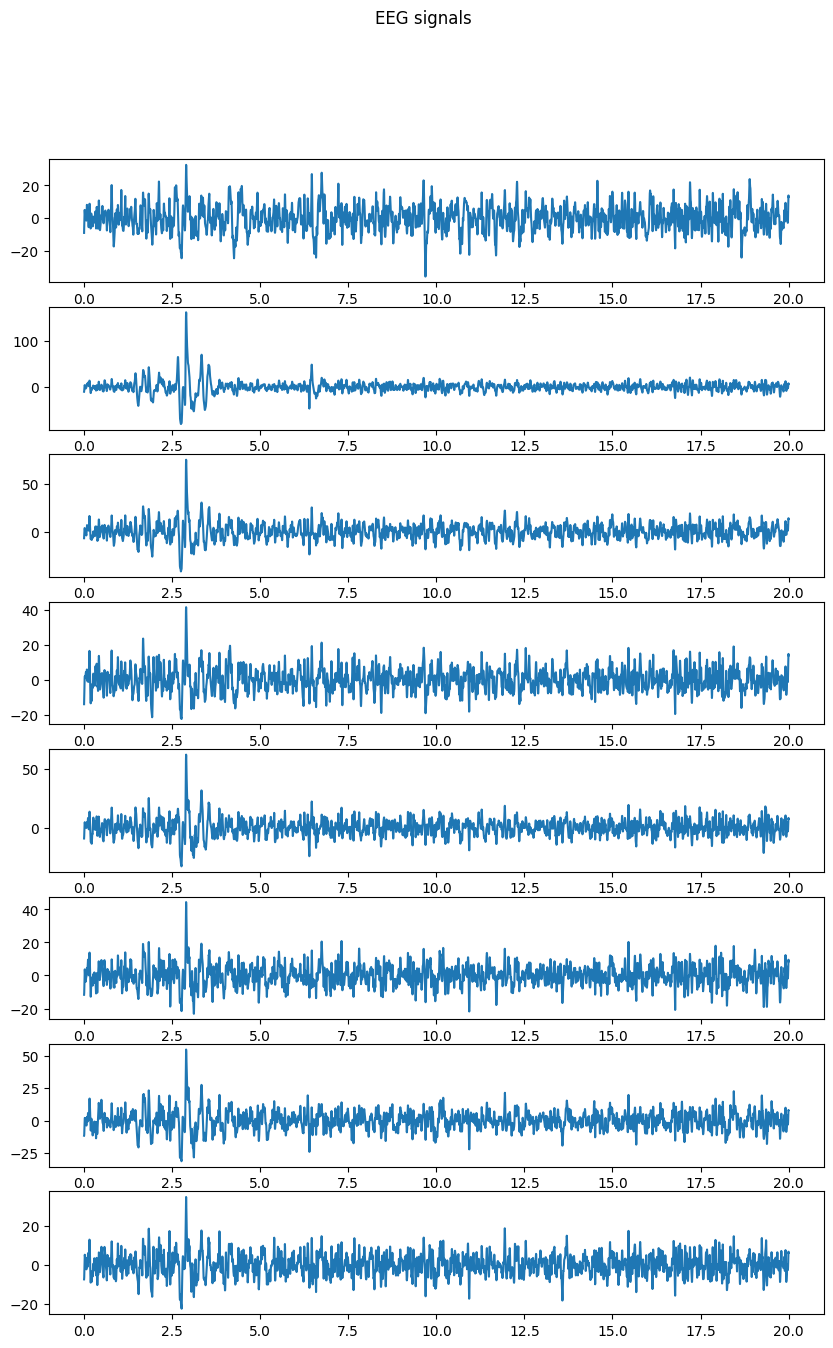

In [7]:
x1 = np.linspace(0, end/fs, end, endpoint=True)

fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals')
for i in range(8):
    axs[i].plot(x1,df['EEG ' + str(i + 1)])



In [4]:
from scipy.fft import rfft, rfftfreq 
from scipy import signal
from scipy.fft import fftshift

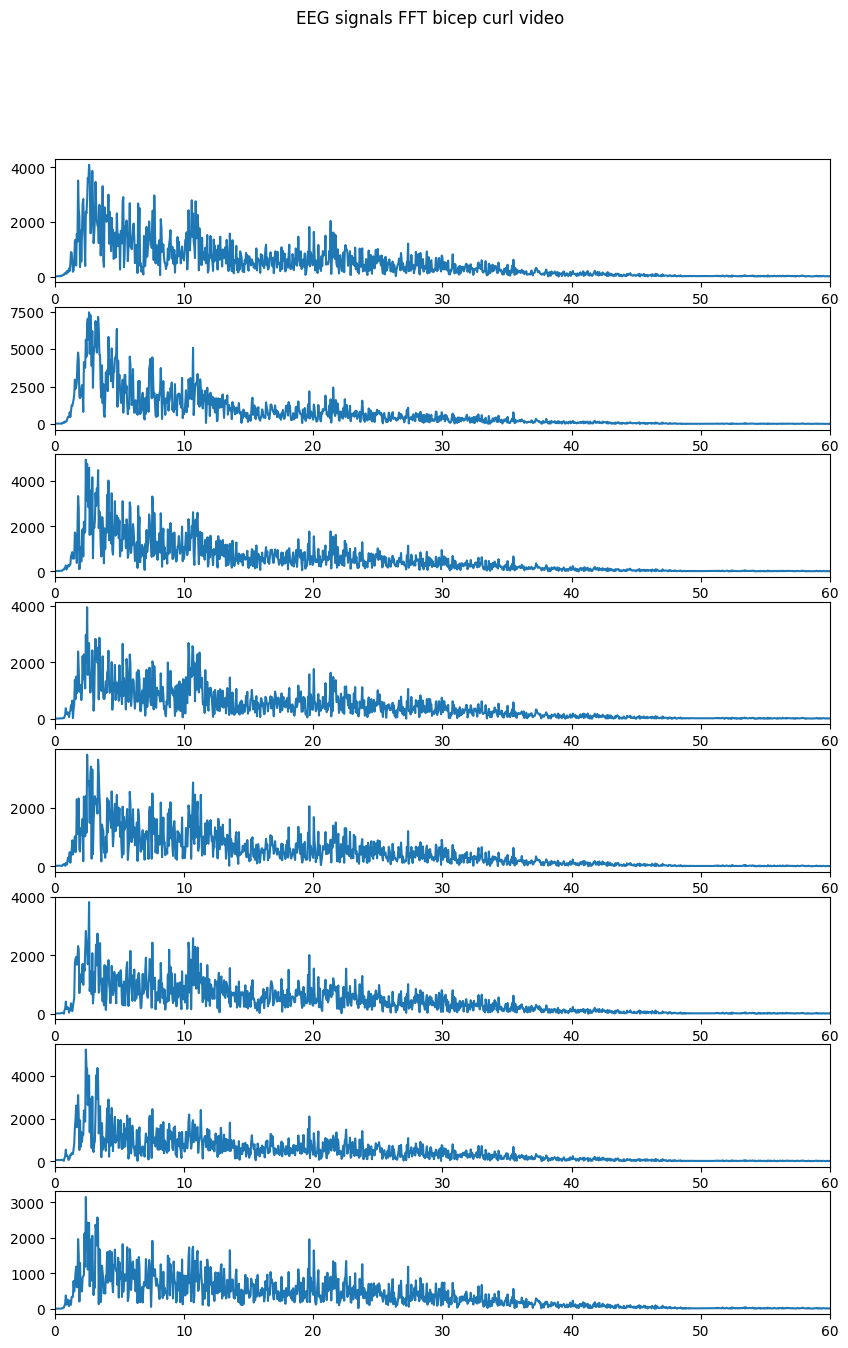

In [8]:
xf = rfftfreq(end, 1 / fs)


fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals FFT bicep curl video')
for i in range(8):
    yf = rfft(np.array(df.iloc[:,i]))
    axs[i].plot(xf, np.abs(yf))
    axs[i].set_xlim([0, 60])
    # Setting the number of ticks 
    axs[i].locator_params(axis='x', nbins=10)
    

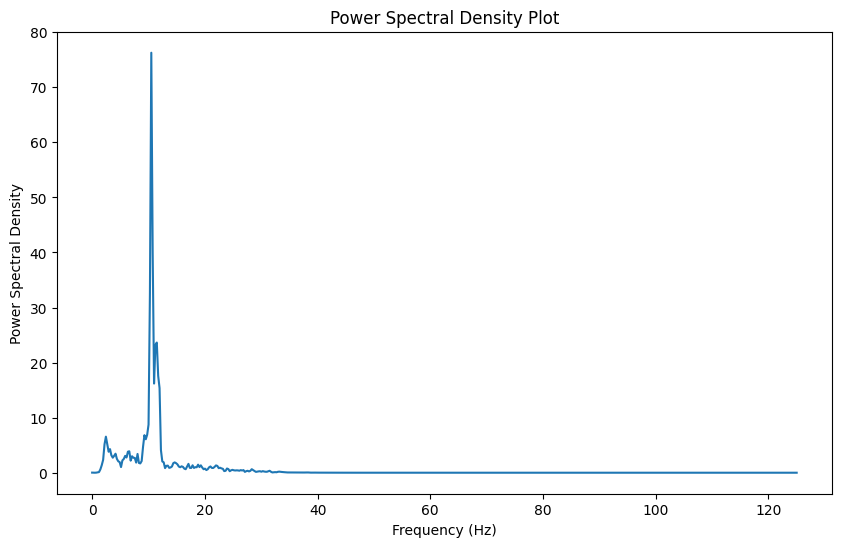

In [80]:
from scipy import signal

# Compute the power spectral density
frequencies, power_density = signal.welch(df.iloc[:,0], fs, nperseg=1024, scaling='density')

# Plot the power spectral density
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_density)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density Plot')
plt.show()


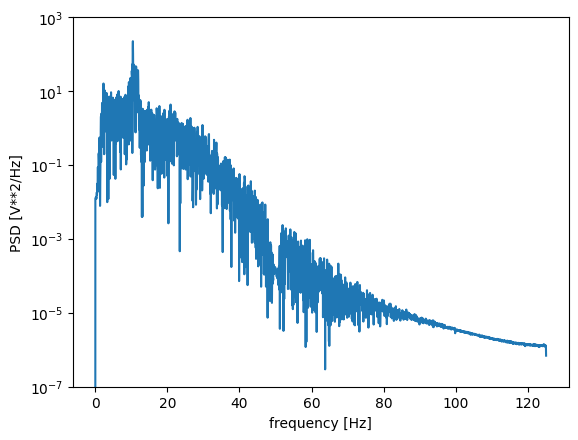

In [81]:
f, Pxx_den = signal.periodogram(df.iloc[:,0], fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e3])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

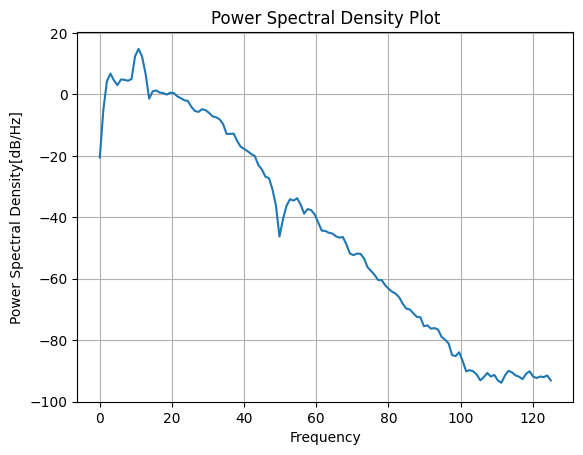

In [82]:
plt.psd(df.iloc[:,0], Fs = 250)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density[dB/Hz]')
plt.title('Power Spectral Density Plot')
plt.show()
